DS5220: Supervised Machine Learning and Learning Theory



Final Project

Credit Risk Analysis 

Shivam Lokhande

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_data = pd.read_csv('/Users/shivamlokhande10/Downloads/credit_risk_dataset.csv')


In [3]:
credit_data.drop_duplicates(inplace=True)
credit_data['person_emp_length'].fillna(credit_data['person_emp_length'].median(), inplace=True)  # Impute missing employment length
credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].median(), inplace=True)  # Impute missing loan interest rate

In [4]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
credit_data = pd.get_dummies(credit_data, columns=categorical_features, drop_first=True)

In [5]:
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler = StandardScaler()
credit_data[numerical_features] = scaler.fit_transform(credit_data[numerical_features])

In [6]:
X = credit_data.drop('loan_status', axis=1)
y = credit_data['loan_status']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
cross_val_scores = cross_val_score(random_forest, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cross_val_scores):.4f}')

Cross-Validation Scores: [0.93233083 0.93078851 0.92788276 0.92768993 0.92711145]
Mean Cross-Validation Score: 0.9292


In [10]:
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [11]:
print("\nModel Performance Metrics:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Model Performance Metrics:
Accuracy: 0.9323
Precision: 0.9655
Recall: 0.7144
F1 Score: 0.8212
ROC AUC: 0.8536


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.97      0.71      0.82      1411

    accuracy                           0.93      6484
   macro avg       0.95      0.85      0.89      6484
weighted avg       0.93      0.93      0.93      6484



In [13]:
feature_importance = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

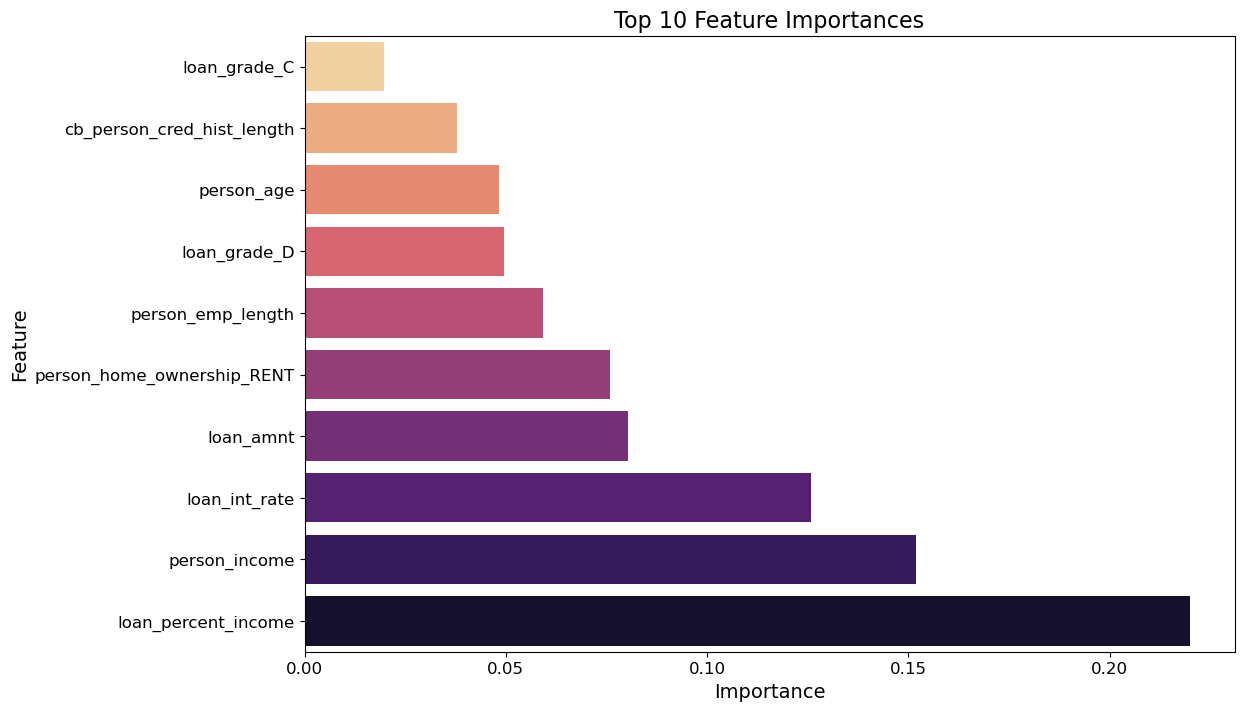

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='magma')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.show()

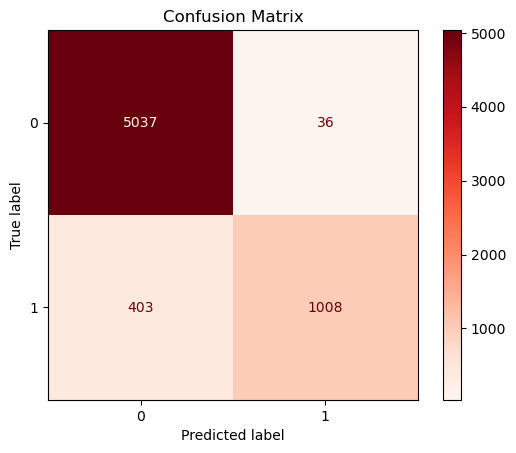

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_display.plot(cmap='Reds', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [16]:
y_pred_probabilities = random_forest.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_pred_probabilities)
roc_auc = auc(false_positive_rate, true_positive_rate)

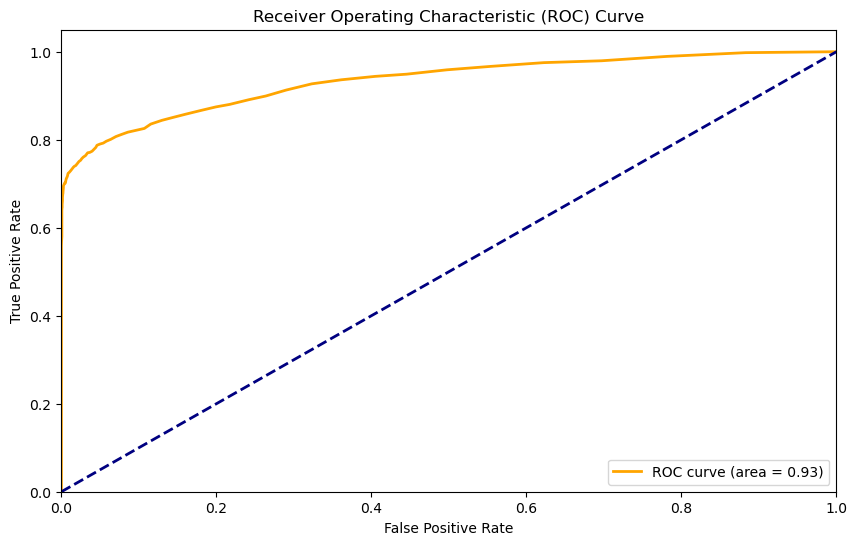

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()